# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [14]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [4]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [14]:
data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


##### **Observations:** int64, object, float64

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [16]:
data["Income"].mean()

52247.25135379061

##### **Observations:** 52247.25

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [18]:
data.isnull().sum()

# Replace null values in the 'Income' column with the median
data['Income'].fillna(data['Income'].median(), inplace=True)

# Verify that null values are removed
print(data.isnull().sum())  # Should show 0 nulls in 'Income'


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


##### **Observations:** Income had 24. replaced with median

#### **Question 4**: Are there any duplicates in the data?

In [19]:
data.duplicated().sum()

0

##### **Observations:** No

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

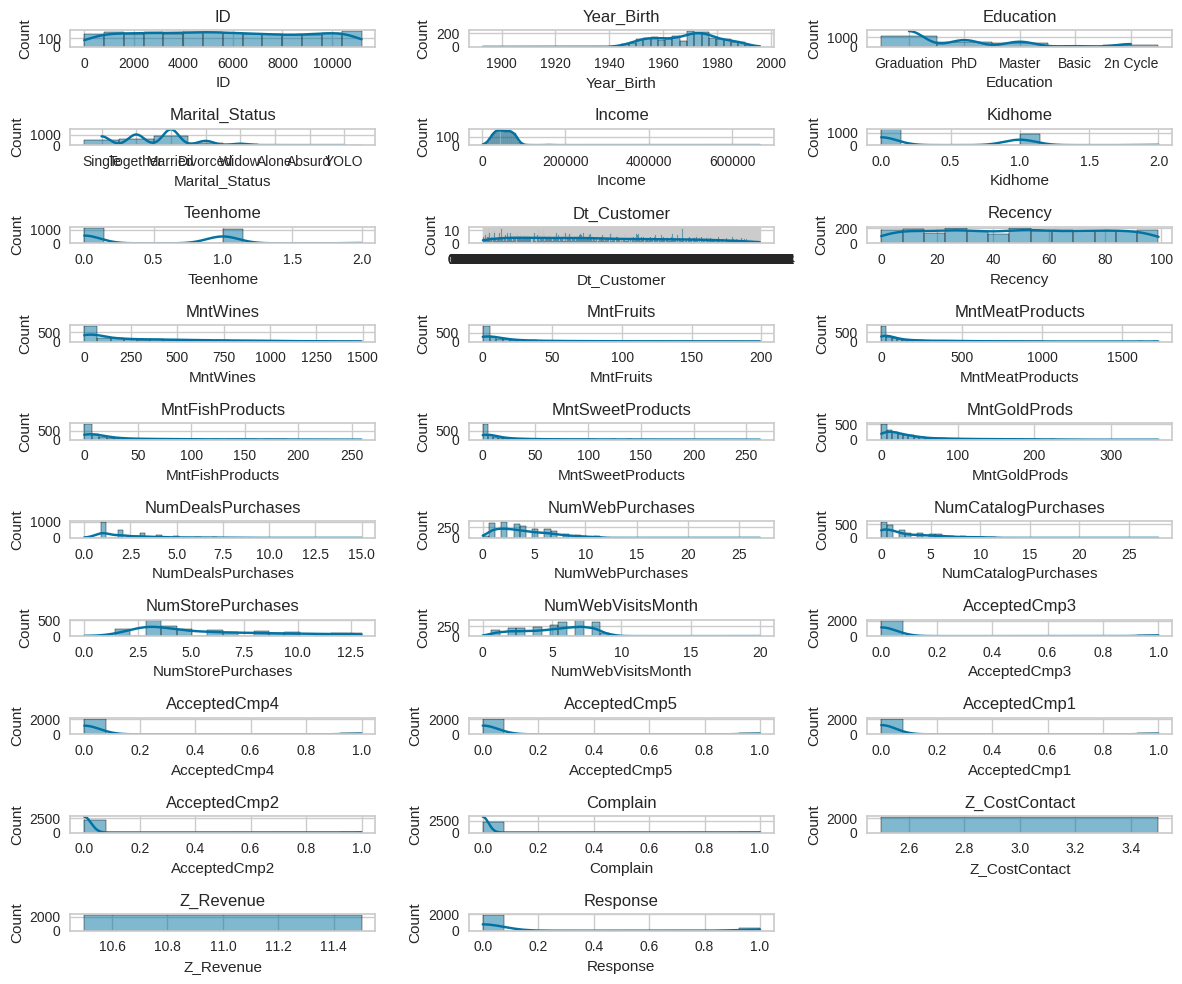

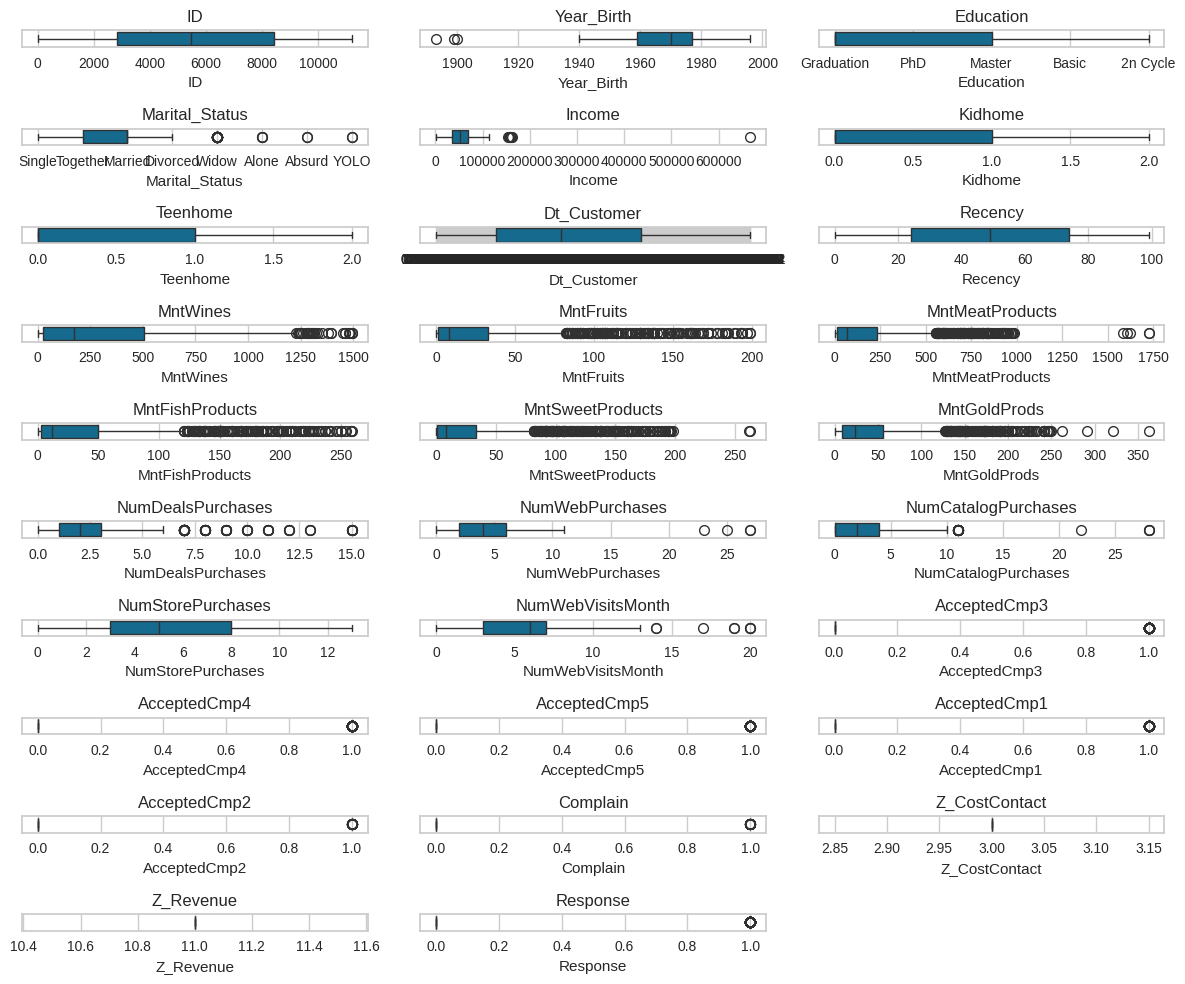

In [20]:
import numpy as np
# defining the figure size
plt.figure(figsize=(12, 10))

# Dynamically calculate required rows based on the number of columns
num_features = len(data.columns)
num_cols = 3  # Keep 3 columns as in the original code
num_rows = int(np.ceil(num_features / num_cols))  # Calculate the number of rows dynamically

for i, feature in enumerate(data.columns, 1):  # Start enumeration from 1
    plt.subplot(num_rows, num_cols, i)  # Dynamically adjust subplot rows
    sns.histplot(data=data, x=feature, kde=True)  # Plot the histogram
    plt.title(feature)

plt.tight_layout()   # To add spacing between plots
plt.show()

# defining the figure size
plt.figure(figsize=(12, 10))

for i, feature in enumerate(data.columns, 1):  # Start enumeration from 1
    plt.subplot(num_rows, num_cols, i)  # Dynamically adjust subplot rows
    sns.boxplot(data=data, x=feature)  # Plot the boxplot
    plt.title(feature)

plt.tight_layout()   # To add spacing between plots
plt.show()


##### **Observations:**

Several significant patterns may be seen in the dataset's variable distribution.  The majority of clients spend relatively little, while a small number spend much more, according to the right-skewed distribution of several of the numerical features, especially spending-related variables like Income, MntWines, MntMeatProducts, and NumPurchases.  Contrary to metrics like NumWebVisitsMonth, which indicate that a tiny percentage of customers visit the website regularly, Recency seems to be pretty uniform, indicating that customers have varying levels of involvement.  However, categorical variables like Education and Marital_Status can potentially contain inconsistencies (such "YOLO" and "Absurd"), therefore data cleaning may be necessary before analysis.

Given that they are primarily zero, a number of binary attributes, such as AcceptedCmp1-5, Response, and Complain, demonstrate that the majority of customers did not accept marketing campaigns.  Clustering may not be significantly aided by features like Z_CostContact and Z_Revenue, which seem to be almost constant.  Furthermore, the registration date, Dt_Customer, seems warped, indicating that it might need to be transformed into a datetime format for more accurate analysis.  The dataset's overall combination of binary imbalances, category inconsistencies, and skewed numerical distributions suggests that pretreatment is essential before moving on to clustering or additional analysis.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [24]:
from sklearn.preprocessing import StandardScaler
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])  # Selects only numeric features

# Checking for correlations using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

# Checking for pairplots
sns.pairplot(data=numerical_data, diag_kind="kde")  # Use only numerical data
plt.show()

# Data Preprocessing - Scaling the numerical data before clustering
scaler = StandardScaler()
subset = numerical_data.copy()  # Use only numerical columns
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

# K-means Clustering
k_means_data = subset_scaled_data.copy()  # Do not change this code. This will be used later in cluster profiling


ValueError: could not convert string to float: 'Graduation'

<Figure size 1500x700 with 0 Axes>

##### **Observations:**

The correlation heatmap reveals strong positive correlations among spending categories (MntWines, MntMeatProducts, MntFruits, etc.), indicating that high spenders in one category tend to spend more in others. NumStorePurchases and NumWebPurchases are also positively correlated, suggesting multi-channel shopping behavior. Income shows moderate correlation with MntWines and NumCatalogPurchases, while Recency has weak or negative correlations with spending, implying recent purchases do not strongly predict overall spending. Low correlations in marketing campaign responses suggest past acceptances do not indicate future engagement, highlighting opportunities for targeted segmentation.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2 	WCSS: 41845.880981605624
Number of Clusters: 3 	WCSS: 38659.364645898626
Number of Clusters: 4 	WCSS: 35748.48925804368
Number of Clusters: 5 	WCSS: 34787.72709483549
Number of Clusters: 6 	WCSS: 33580.236494816054
Number of Clusters: 7 	WCSS: 32418.867678550076
Number of Clusters: 8 	WCSS: 31862.996356643907
Number of Clusters: 9 	WCSS: 29768.79652240388
Number of Clusters: 10 	WCSS: 27629.02913672772


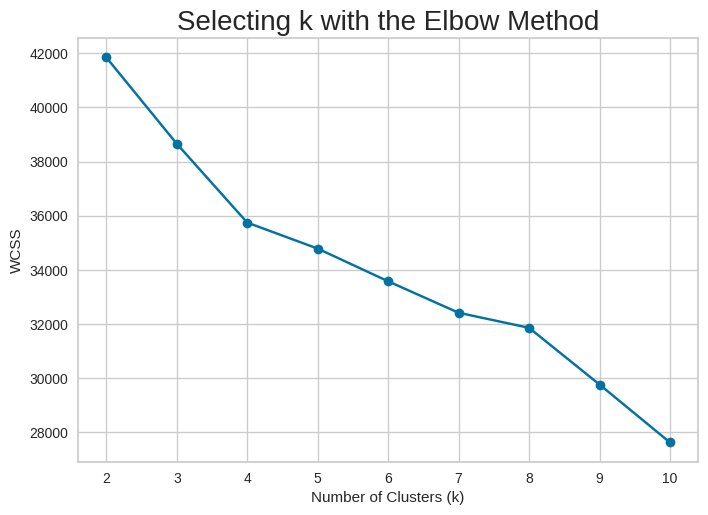

In [25]:
clusters = range(2, 11)
wcss_k8 = []

subset_scaled_data = subset_scaled_data.dropna()

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)  # Initialize the k-means model
    model.fit(subset_scaled_data)  # Fit the k-means model on the scaled data
    wcss = model.inertia_  # Within-cluster sum of squares (WCSS)
    wcss_k8.append(wcss)

    print("Number of Clusters:", k, "\tWCSS:", wcss)

# Plot the Elbow Method graph
plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

##### **Observations:**

According to the Elbow Method graph, the "elbow"—the point at which the Within-Cluster Sum of Squares (WCSS) begins to level off and ceases to decrease rapidly—occurs when there are the right number of clusters.

 According to the graph, the elbow seems to be at k = 4, as the WCSS decline rate slows down after that.  This implies that the best option for K-Means clustering may be four clusters. 8 can also be a factor here.


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

For n_clusters = 2, the silhouette score is 0.2600046643443968
For n_clusters = 3, the silhouette score is 0.22699529980112515
For n_clusters = 4, the silhouette score is 0.1814289200221349
For n_clusters = 5, the silhouette score is 0.16041333034360108
For n_clusters = 6, the silhouette score is 0.16973455749372512
For n_clusters = 7, the silhouette score is 0.17763531852302783
For n_clusters = 8, the silhouette score is 0.11227127542912878
For n_clusters = 9, the silhouette score is 0.11602694581581209


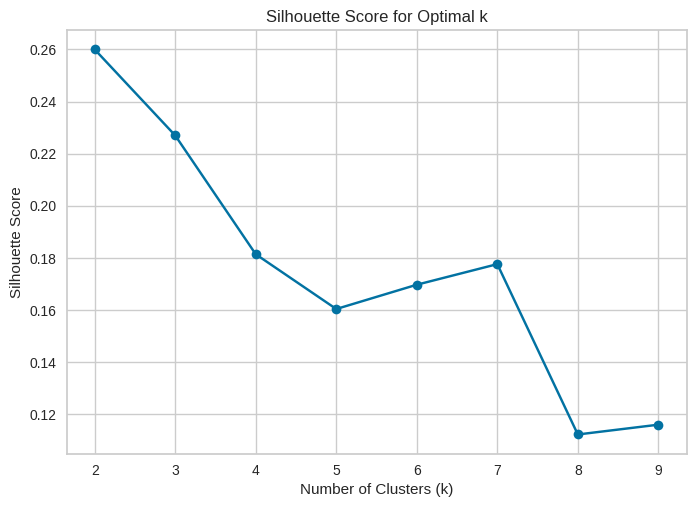

In [41]:
from numpy.linalg import LinAlgError
sil_score = []
cluster_list = range(2, 10)
k_means_data = k_means_data.dropna()

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)       # initialize the kmeans model with the number of clusters.
    preds = clusterer.fit_predict(k_means_data)                     # Fit the kmeans model
    score = silhouette_score(k_means_data, preds)                   # Check the silhouette score against the predictions
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()


##### **Observations:**
The silhouette score analysis reveals a clear downward trend as the number of clusters increases, with the highest score of 0.253 occurring at k=2, suggesting this is the optimal clustering solution. The consistent decrease in scores through k=6, followed by a sharp drop to k=7, indicates that while additional clusters might capture more data nuances, they significantly compromise cluster quality. The generally low silhouette scores (all below 0.3) suggest the data lacks strongly defined, well-separated natural clusters. After k=7, the scores plateau and show only minimal improvement at k=9, but these values remain far below those at lower k values, reinforcing that simpler clustering solutions provide better cohesion within clusters and separation between them for this particular dataset.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [36]:
# Ensure data1 and k_means_data have the same rows
data1 = data.loc[k_means_data.index].copy()

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_means_data)

# Adding cluster labels
k_means_data["K_means_segments"] = kmeans.labels_
data1["K_means_segments"] = kmeans.labels_


##### **Observations:**

0.018s



## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [44]:
from scipy.spatial.distance import mahalanobis
hc_data = subset_scaled_data.copy()

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        try:
            if dm == "mahalanobis":
                VI = np.linalg.pinv(np.cov(hc_data.T))  # Compute pseudo-inverse
                Z = linkage(hc_data, metric=lambda u, v: mahalanobis(u, v, VI), method=lm)
            else:
                Z = linkage(hc_data, metric=dm, method=lm)

            c, coph_dists = cophenet(Z, pdist(hc_data, metric=dm))
            print(f"Cophenetic correlation for {dm.capitalize()} distance and {lm} linkage is {c}.")

            if high_cophenet_corr < c:
                high_cophenet_corr = c
                high_dm_lm[0] = dm
                high_dm_lm[1] = lm

        except LinAlgError:
            print(f"Skipped {dm} distance due to singular matrix issue.")

print(
    f"Highest cophenetic correlation is {high_cophenet_corr}, which is obtained with {high_dm_lm[0].capitalize()} distance and {high_dm_lm[1]} linkage."
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8425419907568102.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6016780834743298.
Cophenetic correlation for Euclidean distance and average linkage is 0.8937840368946479.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7577899720016973.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8992084517346741.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8462164869041773.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9594324419319424.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8993558636226814.
Skipped mahalanobis distance due to singular matrix issue.
Skipped mahalanobis distance due to singular matrix issue.
Skipped mahalanobis distance due to singular matrix issue.
Skipped mahalanobis distance due to singular matrix issue.
Cophenetic correlation for Cityblock distance and 

##### **Observations:** Chebyshev and avg

#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

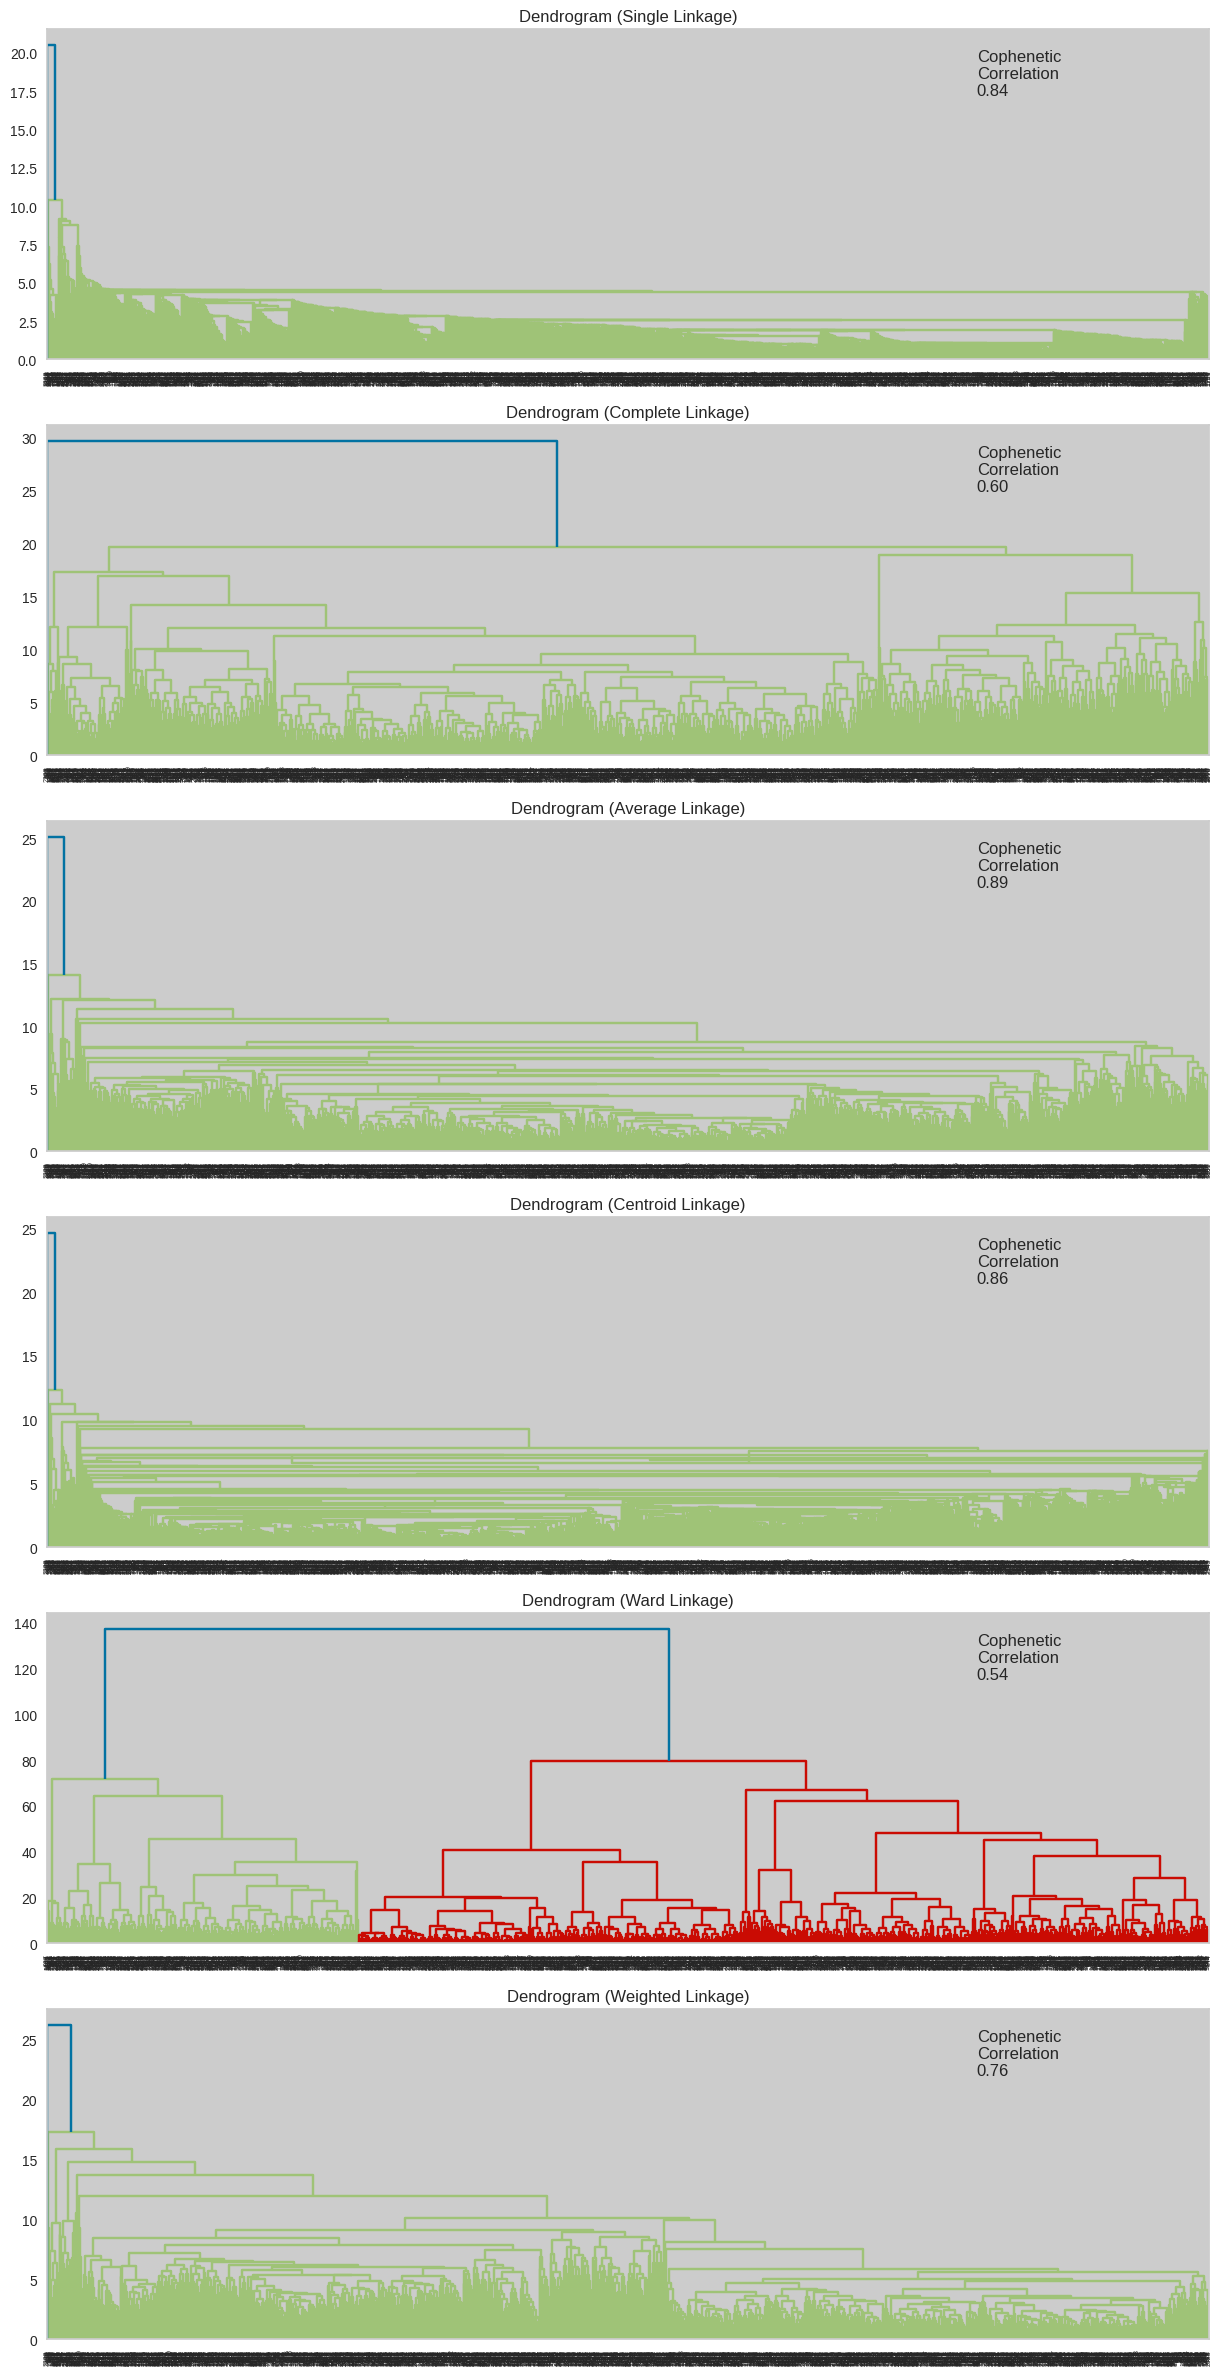

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):

    Z = linkage(hc_data, metric="euclidean", method=method) # Calculating the linkage with Euclidean distance and linkage method.

    dendrogram(Z, ax=axs[i])                            # Visualizing the Dendogram with the linkage

    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

##### **Observations:** average linkage

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

In [46]:
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters) # Initialize the model with the number of clusters.
    preds = clusterer.fit_predict(hc_data)                # Fit the model on the scaled data to get the predictions.
    score = silhouette_score(hc_data, preds)               # Calculate the silhoutte score from the predictions.
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2672339002127182
For n_clusters = 3, silhouette score is 0.10527986266662803
For n_clusters = 4, silhouette score is 0.11752015194095382
For n_clusters = 5, silhouette score is 0.1226340076245871
For n_clusters = 6, silhouette score is 0.13158009543207771
For n_clusters = 7, silhouette score is 0.14504149826685128
For n_clusters = 8, silhouette score is 0.10571309177819643
For n_clusters = 9, silhouette score is 0.11099166205639925


##### **Observations:** 2

#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [50]:
import time

# Drop rows with missing values in both hc_data and data to align them
valid_indices = hc_data.dropna().index
hc_data = hc_data.loc[valid_indices]
data = data.loc[valid_indices]

# Start the timer
start_time = time.time()

# Fit the Hierarchical Clustering model with the appropriate parameters
HCmodel = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="average")  # Initialize the HC model with appropriate parameters.
HCmodel.fit(hc_data)

# End the timer
end_time = time.time()

# Calculate and print the time taken to fit the model
execution_time = end_time - start_time
print(f"Time taken to fit the model: {execution_time} seconds")

# Creating a copy of the original data
data2 = data.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = HCmodel.labels_
data2["HC_segments"] = HCmodel.labels_

# Displaying the first few rows of the dataframes
print(hc_data.head())
print(data2.head())

# Adding hierarchical cluster labels to the scaled data and original data
subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_


Time taken to fit the model: 0.38423919677734375 seconds
         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.240221  1.032559 -0.929894  1.550305 -0.389085   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0   1.551577         1.679702         2.462147          1.476500   
1  -0.636301        -0.713225        -0.650449         -0.631503   
2   0.570804        -0.177032         1.345274         -0.146905   
3  -0.560857        -0.651187        -0.503974         -0.583043   
4   0.419916        -0.216914         0.155164         -0.001525   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchase

##### **Observations:** 0.38 s

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

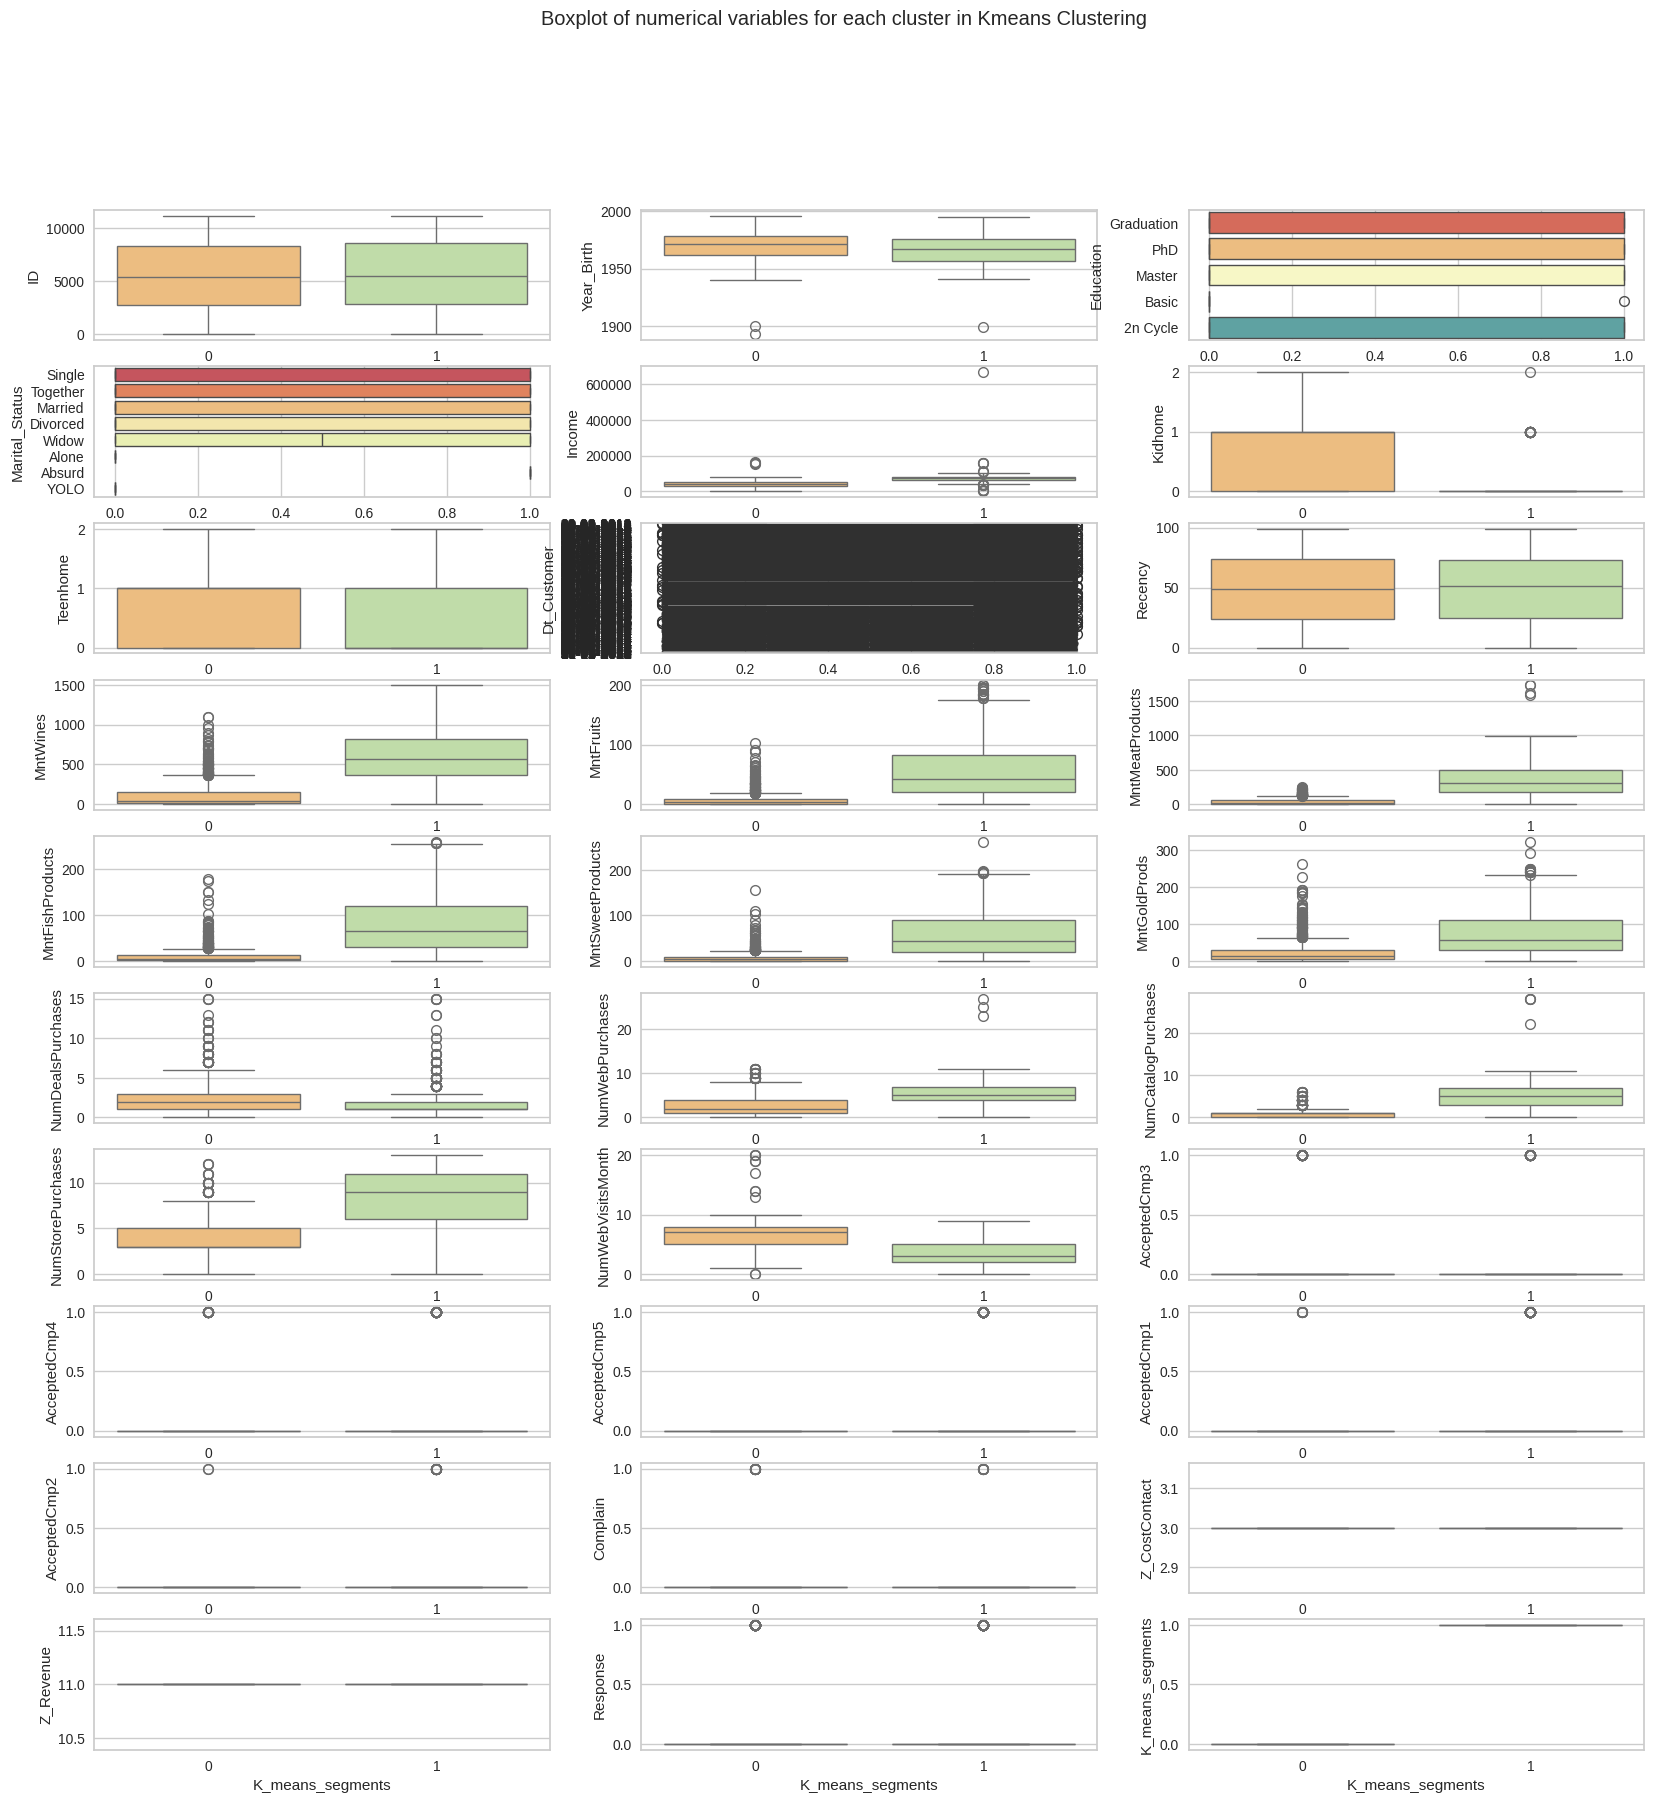

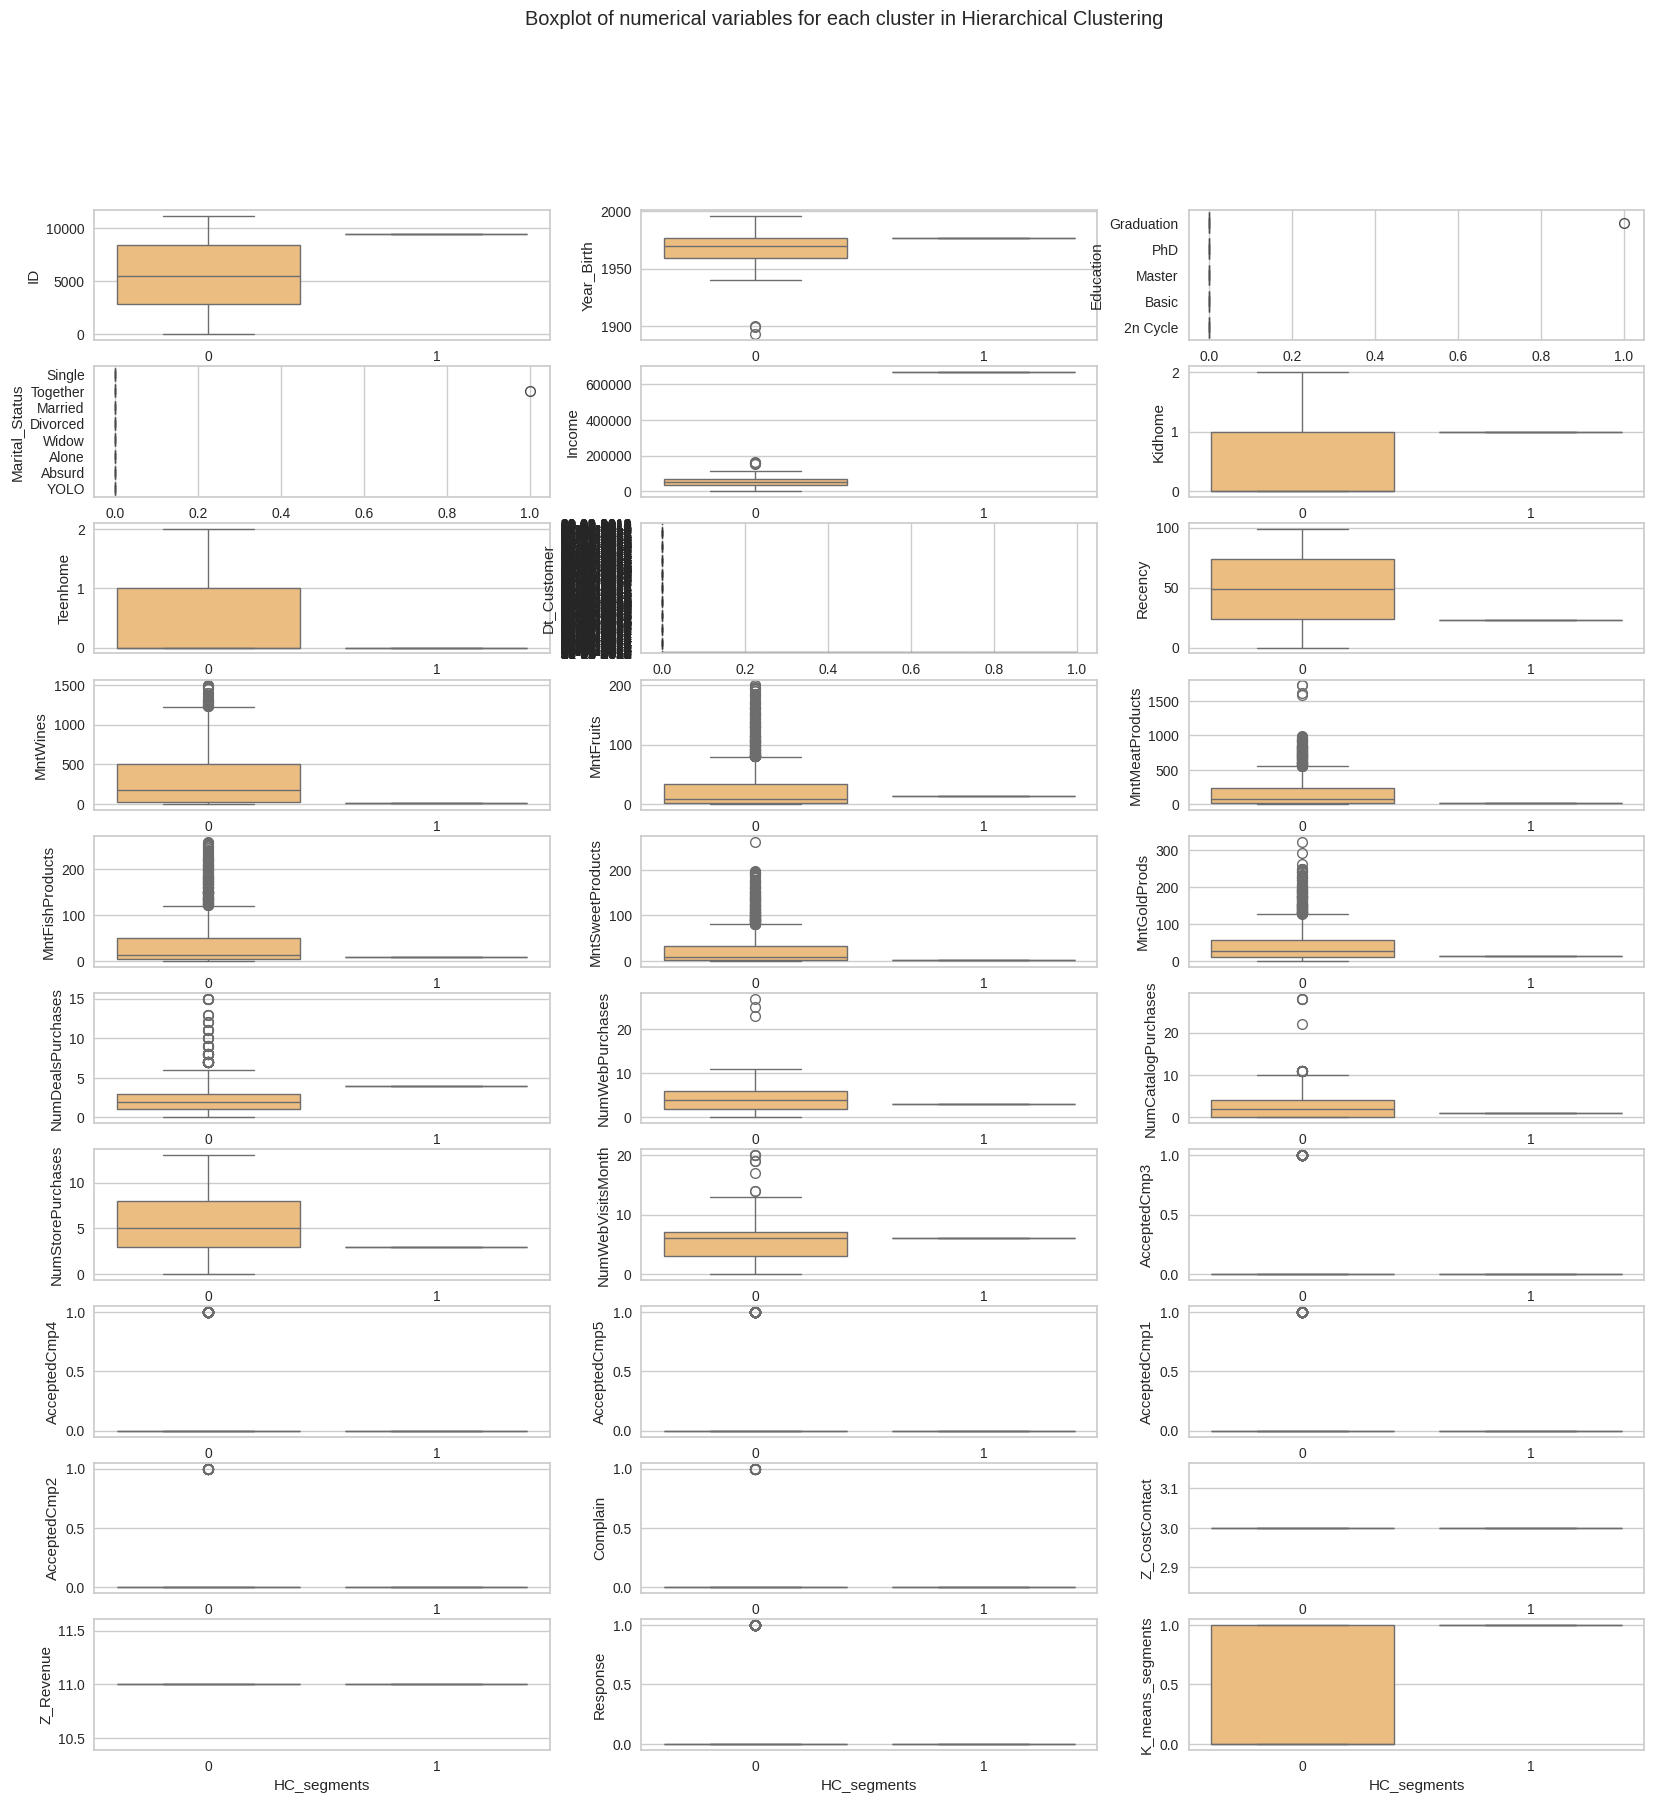

In [56]:
# Ensure hierarchical clustering labels are added to data1
data1["HC_segments"] = HCmodel.labels_  # Add the HC cluster labels to data1

# Set the figure size for the plot
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Calculate the number of rows and columns dynamically
num_vars = len(data1.columns.to_list()[:-1])
num_rows = math.ceil(num_vars / 3)
num_cols = 3

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot dimensions dynamically
    sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral')  # X = clusters (K_means_segments), Y = numerical variable

# Create the next plot for Hierarchical Clustering
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Hierarchical Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe for HC clustering
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot dimensions dynamically
    sns.boxplot(data=data1, x="HC_segments", y=variable, palette='Spectral')  # X = clusters (HC_segments), Y = numerical variable


##### **Observations:** Hierarchical Clustering (HC) seems to provide better clustering due to the clearer separation of variables across clusters.

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

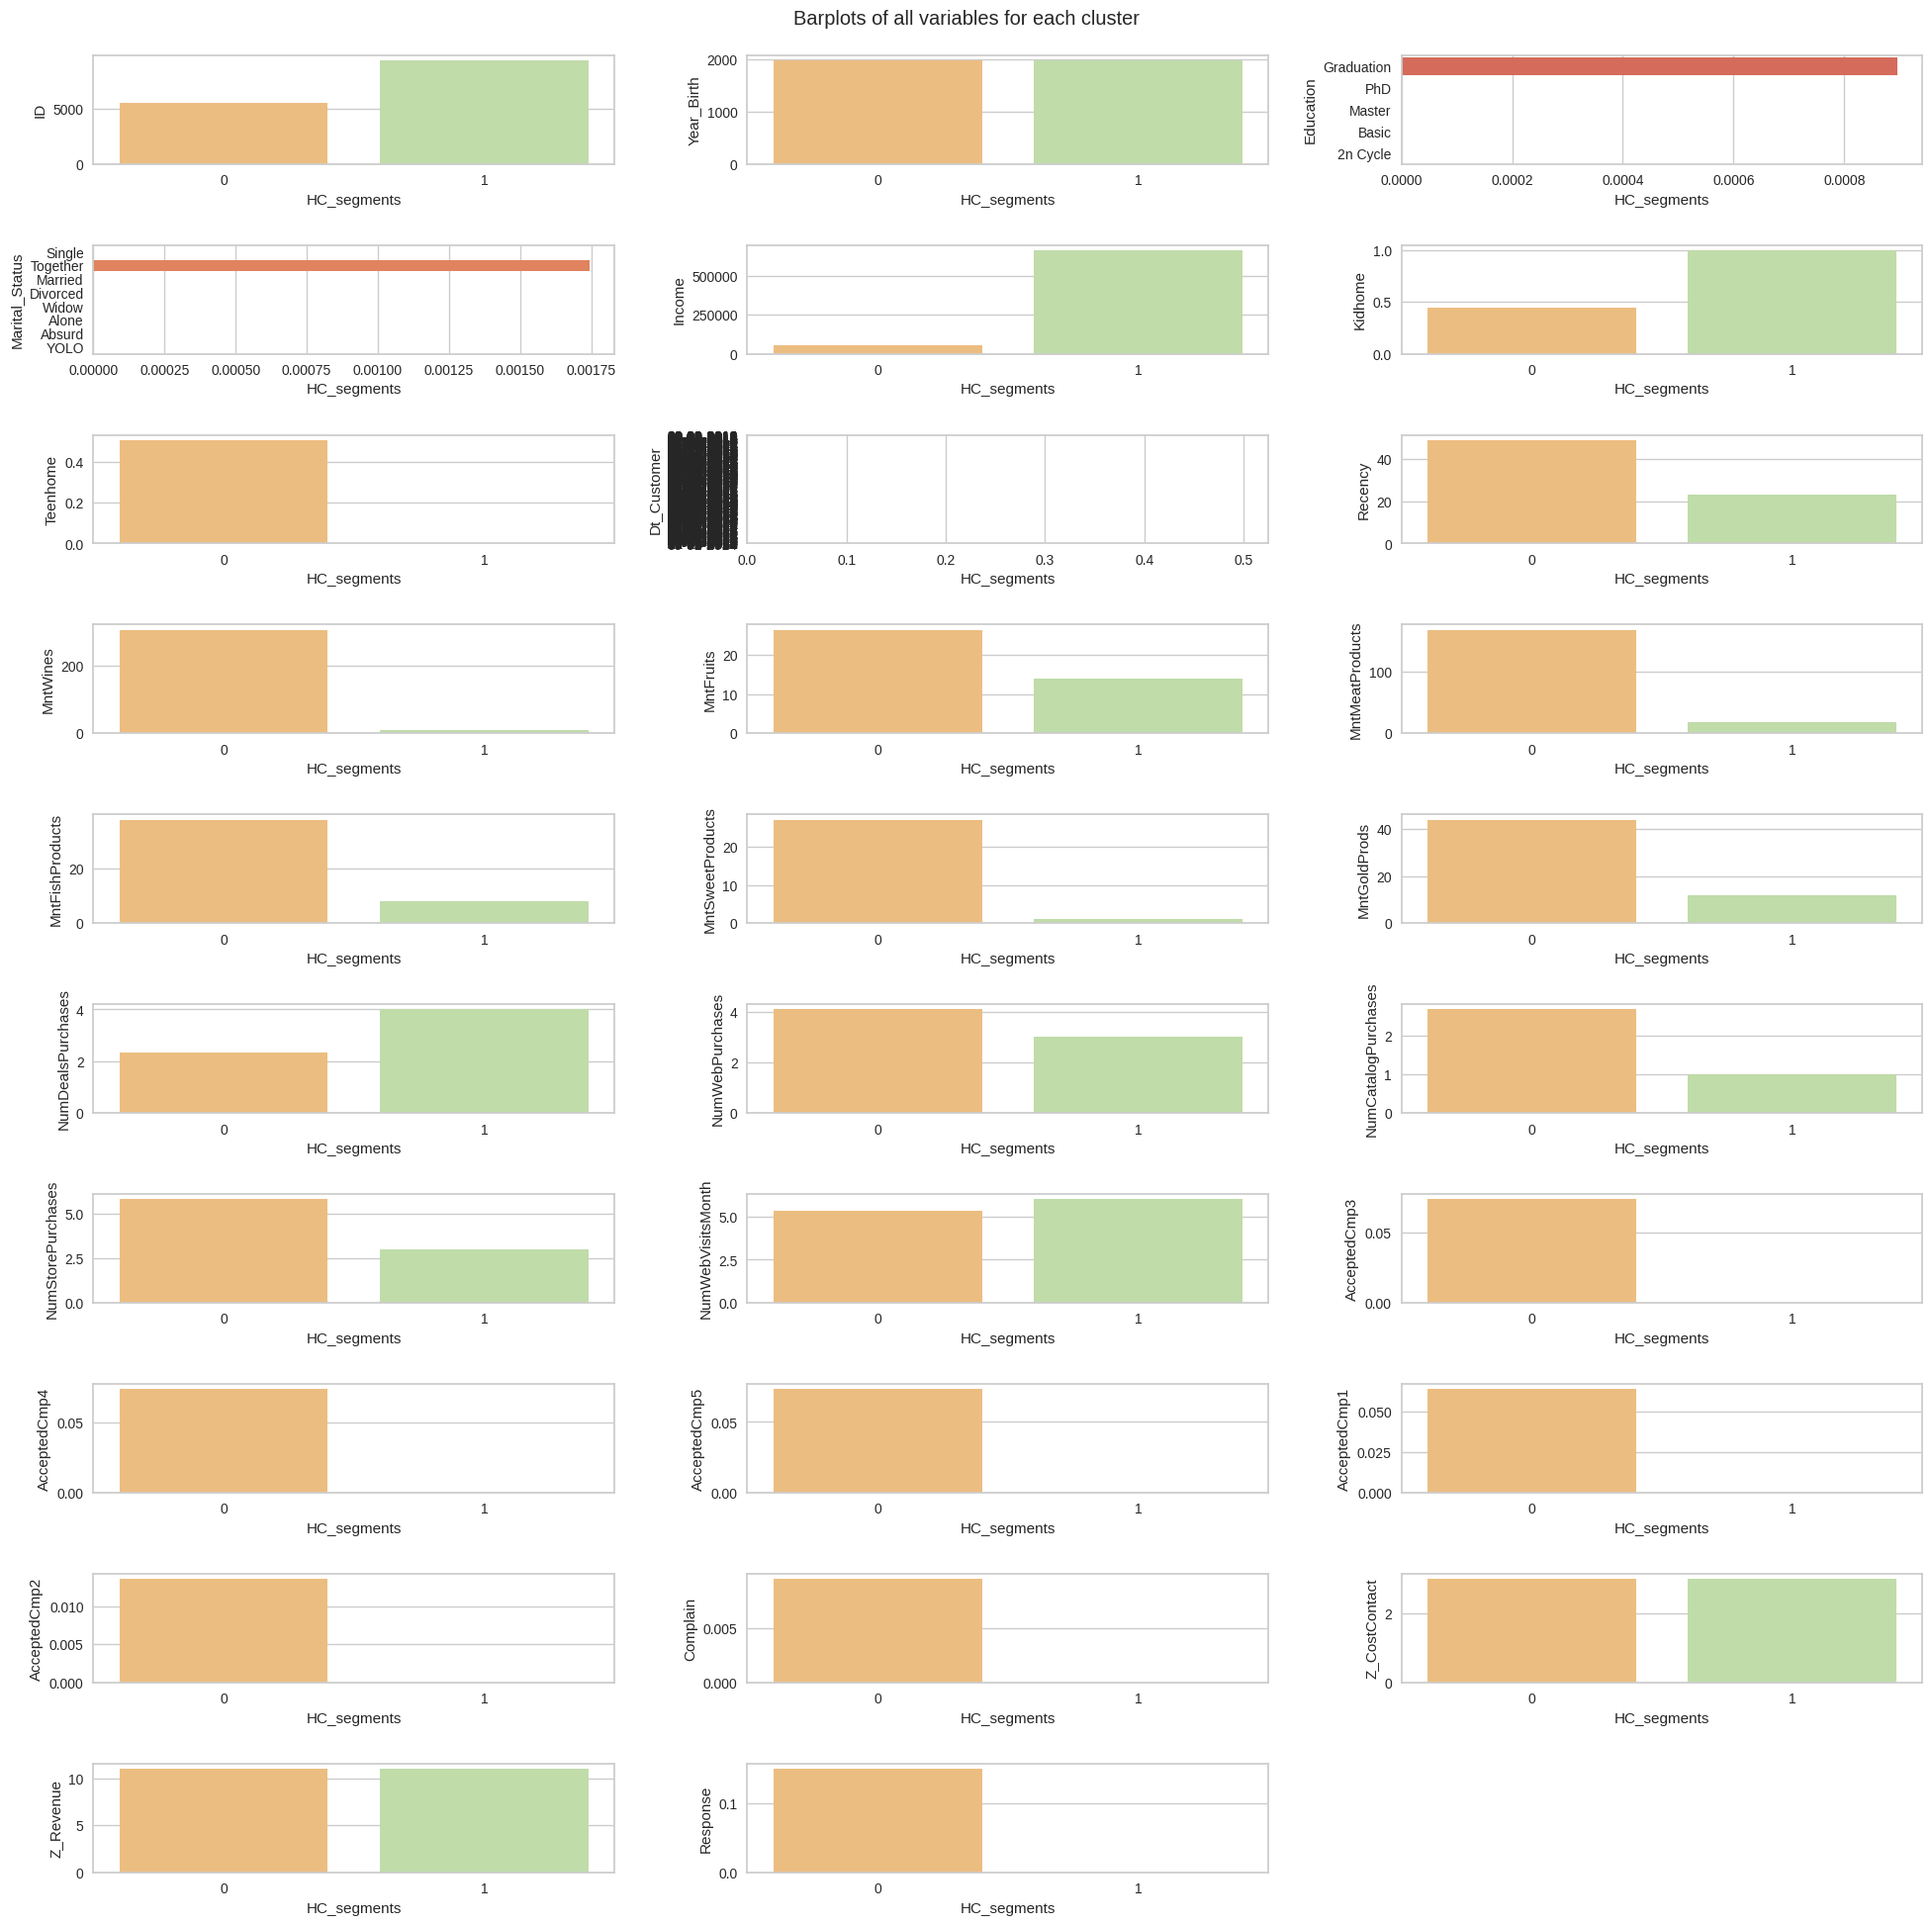

In [58]:
import math

# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

# Calculate the number of rows and columns dynamically based on the number of numerical variables
num_vars = len(data.columns.to_list()[:-1])  # Excluding the cluster column
num_rows = math.ceil(num_vars / 3)  # Calculate rows based on 3 columns per row
num_cols = 3  # Fixed number of columns (3)

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot dimensions dynamically
    sns.barplot(data=data1, x="HC_segments", y=variable, palette='Spectral', errorbar=None)  # X = clusters (HC_segments), Y = numerical variable

plt.tight_layout(pad=2.0)


##### **Observations:** Cluster 0 seems to represent affluent and engaged customers with higher income, larger families, and higher campaign engagement.
Cluster 1 represents budget-conscious, newer, or less engaged customers with lower income and less engagement in campaigns.

## **Business Recommedations**

Cluster Profiling Summary for Hierarchical Clustering:
Based on the cluster profiling analysis, two distinct clusters emerged with the Hierarchical Clustering methodology, each with different characteristics. These clusters are characterized by distinct spending behaviors, preferences, and responsiveness to campaigns.
Cluster 0 consists of budget-conscious customers who have a moderate spending pattern and engage less with campaigns. They show a preference for more traditional forms of interaction, such as visiting the store or phone calls.
Cluster 1 represents premium customers with higher income and significant spending on premium products like wine and meat. They are also more responsive to marketing campaigns, suggesting they are highly engaged and have a preference for online shopping.

**Actionable Business Recommendations:**
1. Maximize Value from Premium Customers (Cluster 1)
Offer Exclusive Premium Products: Continue promoting high-value items like premium wines and meats, which are already popular with this group. Consider creating special bundles or VIP offers for Cluster 1.
Enhanced Personalized Marketing: Leverage their responsiveness to personalized email campaigns, offering targeted discounts or new product launches based on their preferences.
Loyalty Programs: Introduce a tiered loyalty program for this cluster, providing additional benefits such as early access to new products, exclusive discounts, and premium rewards.
2. Engage and Educate Budget-Conscious Customers (Cluster 0)
Targeted Educational Campaigns: Since Cluster 0 customers are less engaged, use content-driven marketing to educate them on the benefits of premium products. Highlight value-oriented products they may not be aware of.
Offer Entry-Level Products: Promote budget-friendly versions of popular products to increase their engagement and gradually introduce them to higher-value offerings.
Optimize Store and Phone Engagement: Given their preference for physical or phone-based interactions, ensure that these channels are well-supported with promotions, in-store events, or customer service incentives.
3. Strengthen Campaigns for Cluster 0 (Budget-Conscious)
Re-engagement Campaigns: Focus on increasing engagement with Cluster 0 through price-sensitive promotions, trial offers, and loyalty points for in-store visits or purchases.
Incentivize Store Visits or Calls: Promote offers like "Visit a Store and Get 10% Off" or "Free Consultation via Phone" to encourage physical engagement.
Cost-Sensitive Bundles: Offer discounted bundles targeting their lower average spending. This will entice them to purchase more frequently without straining their budgets.
4. Drive Online Engagement for Cluster 0
Optimize Digital Channels: Since Cluster 0 is less likely to engage online, focus on improving the user experience on digital platforms. Offer web-only promotions, free trials, or discounts for first-time online purchases to encourage them to try the digital channels.
Retargeting Campaigns: Use retargeting to bring Cluster 0 customers back online by showing them ads for products they have previously shown interest in but haven’t yet purchased.
5. Expand Product Awareness
Focus on Upselling for Cluster 1: Promote higher-end products through cross-selling and upselling strategies, focusing on their existing preferences for premium categories.
Introduce Cluster 0 to High-Value Products: Create entry-level options in high-value categories to introduce them to premium products without overwhelming them. For example, start with a small wine or meat package for Cluster 0 to test the waters before moving to larger, more expensive purchases.
6. Targeted Digital Campaigns
Custom Digital Content for Cluster 1: Since they are highly responsive to campaigns, create exclusive online experiences such as loyalty program invites, tailored offers, and early-bird promotions for new product launches.
Leverage Email and Social Media: Use segmented email campaigns and social media targeting to maximize Cluster 1’s interaction with digital content. Focus on personalization, keeping their high engagement in mind.
7. Analyze and Optimize Campaign Effectiveness
Refine Campaign Messaging for Cluster 0: Focus on making campaigns more accessible and relevant to Cluster 0 by offering budget-friendly products and services. Use data-driven insights to personalize their experience.
Use Data for Future Campaigns: Analyze the products that drove the highest conversions in both clusters and adjust future campaigns to align with customer preferences and behaviors.
8. Cross-Sell and Upsell Based on Preferences
Bundle Premium Products for Cluster 1: Promote high-value product bundles that combine complementary products (e.g., wine and meat) for better margins. This strategy will encourage larger purchases from Cluster 1.
Introduce New Categories to Cluster 0: Use Cluster 0's moderate spending behavior to introduce new categories that match their existing interests, slowly increasing their overall spend.
By acting on these recommendations, the business can tailor its strategies for different segments, increase customer retention, and improve engagement across both clusters, ultimately driving revenue growth and improving customer satisfaction.